In [14]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics import mean_absolute_error as MAE


In [15]:
df = pd.read_csv('C:/Users/neelg/OneDrive/Desktop/Projects/Poverty Data Project/Poverty Data.csv')

In [16]:
df.dtypes

row_id                                                int64
area__rucc                                           object
area__urban_influence                                object
econ__economic_typology                              object
econ__pct_civilian_labor                            float64
econ__pct_unemployment                              float64
econ__pct_uninsured_adults                          float64
econ__pct_uninsured_children                        float64
demo__pct_female                                    float64
demo__pct_below_18_years_of_age                     float64
demo__pct_aged_65_years_and_older                   float64
demo__pct_hispanic                                  float64
demo__pct_non_hispanic_african_american             float64
demo__pct_non_hispanic_white                        float64
demo__pct_american_indian_or_alaskan_native         float64
demo__pct_asian                                     float64
demo__pct_adults_less_than_a_high_school

In [17]:
df.isnull().sum()

row_id                                                 0
area__rucc                                             0
area__urban_influence                                  0
econ__economic_typology                                0
econ__pct_civilian_labor                               0
econ__pct_unemployment                                 0
econ__pct_uninsured_adults                             2
econ__pct_uninsured_children                           2
demo__pct_female                                       2
demo__pct_below_18_years_of_age                        2
demo__pct_aged_65_years_and_older                      2
demo__pct_hispanic                                     2
demo__pct_non_hispanic_african_american                2
demo__pct_non_hispanic_white                           2
demo__pct_american_indian_or_alaskan_native            2
demo__pct_asian                                        2
demo__pct_adults_less_than_a_high_school_diploma       0
demo__pct_adults_with_high_scho

In [18]:
df = df.drop(['row_id'], axis=1)

In [19]:
df = df.dropna(subset=['econ__pct_uninsured_adults', 'econ__pct_uninsured_children','demo__pct_female','demo__pct_below_18_years_of_age','demo__pct_aged_65_years_and_older','demo__pct_hispanic','demo__pct_non_hispanic_african_american','demo__pct_non_hispanic_white','demo__pct_american_indian_or_alaskan_native','demo__pct_asian','health__pct_adult_obesity','health__pct_diabetes','health__pct_physical_inacticity','health__air_pollution_particulate_matter'])

In [20]:
df['health__pct_adult_smoking'] = df['health__pct_adult_smoking'].fillna((df['health__pct_adult_smoking'].median()))
df['health__pct_low_birthweight'] = df['health__pct_low_birthweight'].fillna((df['health__pct_low_birthweight'].median()))
df['health__pop_per_dentist'] = df['health__pop_per_dentist'].fillna((df['health__pop_per_dentist'].median()))
df['health__pop_per_primary_care_physician'] = df['health__pop_per_primary_care_physician'].fillna((df['health__pop_per_primary_care_physician'].median()))
df['health__motor_vehicle_crash_deaths_per_100k'] = df['health__motor_vehicle_crash_deaths_per_100k'].fillna((df['health__motor_vehicle_crash_deaths_per_100k'].median()))

In [21]:
df = df.drop(['health__pct_excessive_drinking', 'health__homicides_per_100k'], axis=1)

Text(0.5, 2.05, 'Pearson Correlation of Features')

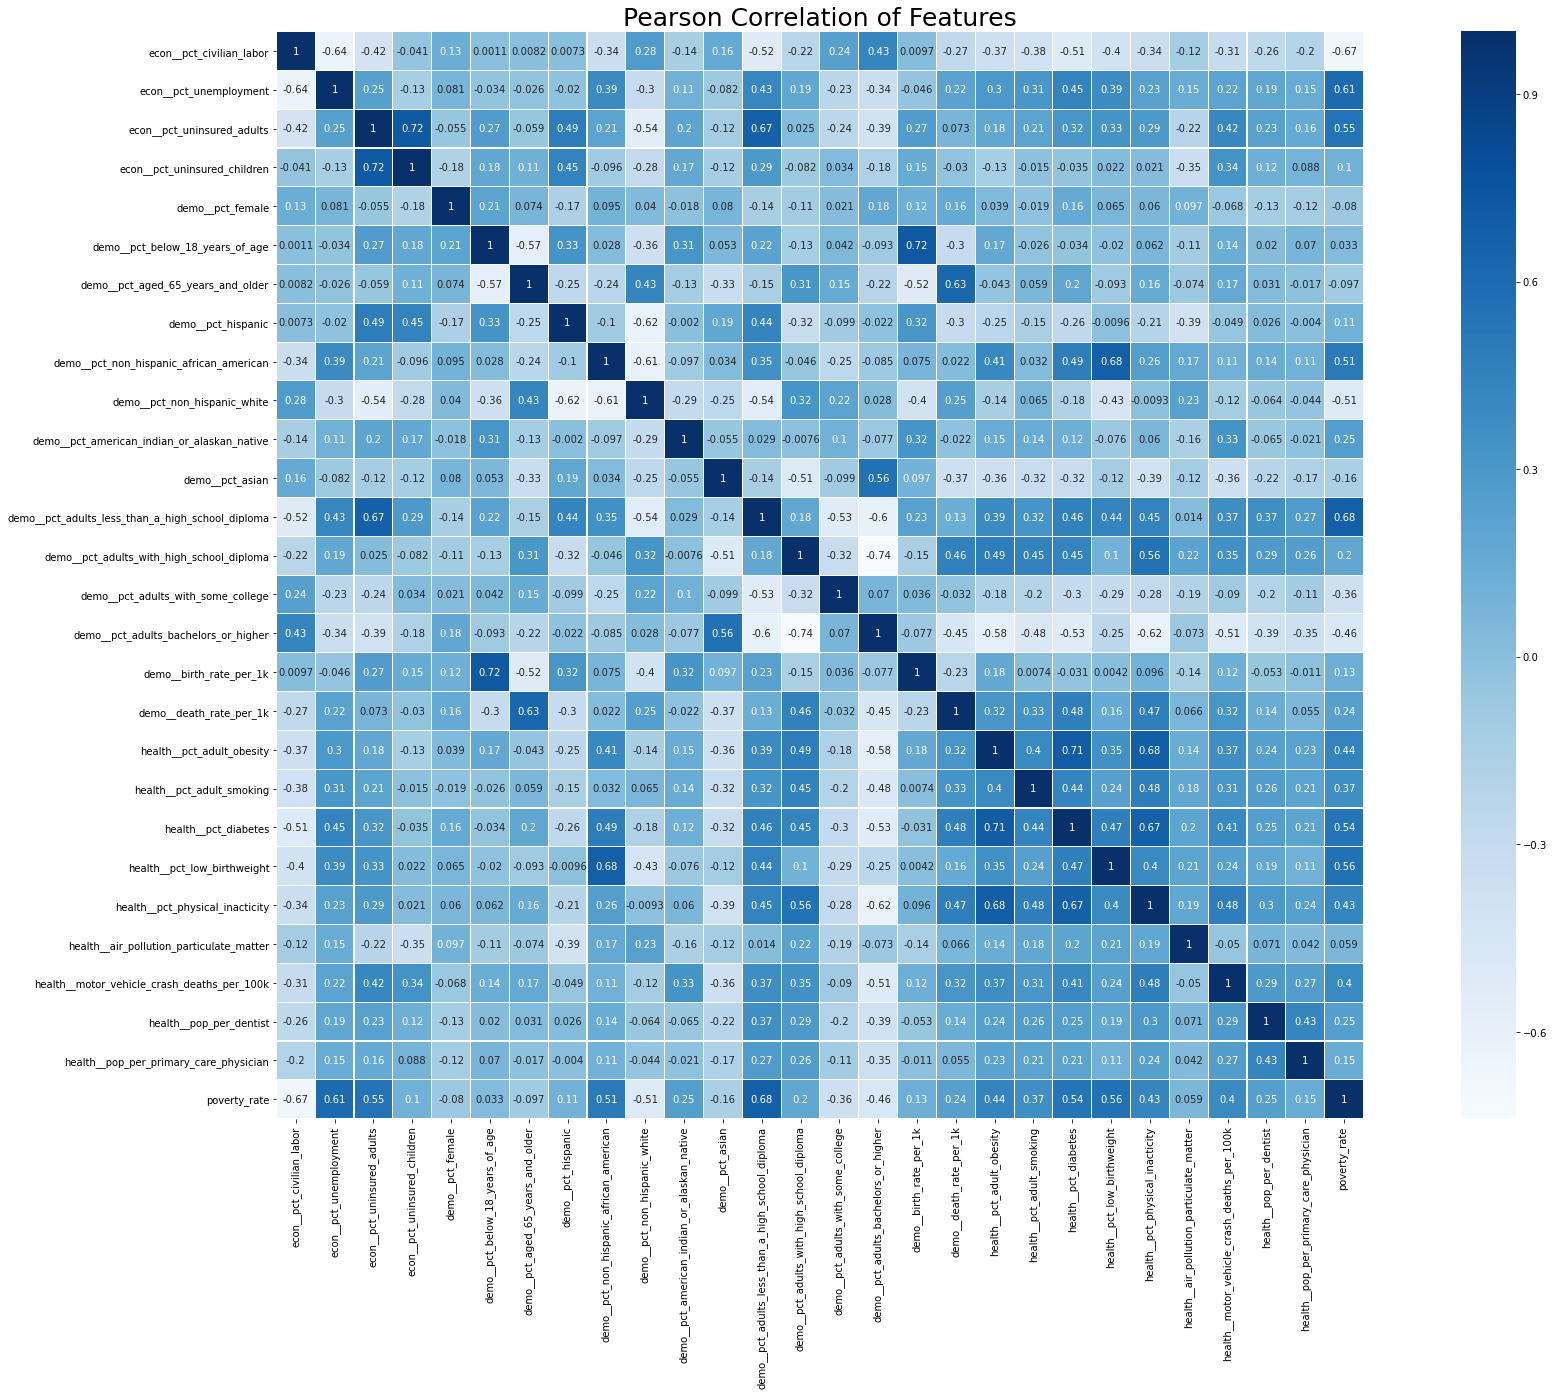

In [22]:
corr = df.corr()
f,ax = plt.subplots(figsize=(35,20))
heatmap= sns.heatmap(corr,cmap="Blues",square=True,ax=ax,annot=True,linewidth=0.1)
plt.title('Pearson Correlation of Features',y=2.05,size=25)

In [23]:
df = pd.get_dummies(df,drop_first=True)

In [24]:
y = df.poverty_rate
X = df.drop('poverty_rate', axis=1)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=123)

## Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

linear_reg_pred = linear_reg.predict(X_test)

linear_reg_mae = MAE(y_test,linear_reg_pred)

print('Mean absolute error of Linear Regression is: {}'.format(linear_reg_mae))

Mean absolute error of Linear Regression is: 2.3503481217950095


## Ridge Regression

In [27]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

steps = [('scaler', StandardScaler()),
         ('regressor', Ridge())]

ridge_pipeline = Pipeline(steps)

ridge_reg_params = {'regressor__alpha':[0,0.1,.04,.03,.02,.01,.001,.0001,15]}

ridge_grid = GridSearchCV(ridge_pipeline, param_grid=ridge_reg_params,cv=5)

ridge_grid.fit(X_train, y_train)

ridge_grid_pred = ridge_grid.predict(X_test)

ridge_grid_mae = MAE(y_test,ridge_grid_pred)

print('Mean absolute error of Ridge Regression is: {}'.format(ridge_grid_mae))

Mean absolute error of Ridge Regression is: 2.3480988318910088


## Support Vector Machine

In [16]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

steps = [('scaler', StandardScaler()),
         ('regressor', SVR())]

SVR_pipeline = Pipeline(steps)

SVR_pipeline.fit(X_train,y_train)

SVR_pred = SVR_pipeline.predict(X_test)

SVR_mae = MAE(y_test,SVR_pred)

print('Mean absolute error of SVR is: {}'.format(SVR_mae))

Mean absolute error of SVR is: 2.352109047554204


### Tuning Support Vector Machine

In [17]:
SVR_params = {'regressor__C':[56,57,59],'regressor__gamma':[.001,.01,.1,10]}

SVR_grid = GridSearchCV(SVR_pipeline, param_grid=SVR_params,cv=5,verbose=1)

SVR_grid.fit(X_train, y_train)

SVR_grid_pred = SVR_grid.predict(X_test)

SVR_grid_mae = MAE(y_test,SVR_grid_pred)

print('Mean absolute error of Ridge Regression is: {}'.format(SVR_grid_mae))
print('The best parameters for Ridge Regression are: {}'.format(SVR_grid.best_params_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.3min finished


Mean absolute error of Ridge Regression is: 1.7812653538109477
The best parameters for Ridge Regression are: {'regressor__C': 56, 'regressor__gamma': 0.01}


## Decision Tree

In [18]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor()

dt_regressor.fit(X_train,y_train)

dt_predict = dt_regressor.predict(X_test)

dt_mae = MAE(y_test,dt_predict)

print('Mean absolute error of Decision Tree is: {}'.format(dt_mae))

Mean absolute error of Decision Tree is: 2.962168978562421


### Tuning Decision Tree

In [19]:
params_dt = {
'min_samples_split': range(1,10,2),
'max_depth': range(1,10,1),
'min_samples_leaf': [1,6,2]   
}
### WARNING: n_jobs= -1 will use all cpu power, remove it if you do not want to use all cpu power) ###
dt_grid = GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=params_dt,cv=5,verbose=1,n_jobs=-1)

dt_grid.fit(X_train, y_train)

dt_grid_pred = dt_grid.predict(X_test)

dt_grid_mae = MAE(y_test,dt_grid_pred)

print('Mean absolute error of Decision Tree is: {}'.format(dt_grid_mae))
print('The best parameters are: {}'.format(dt_grid.best_params_))

Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    5.6s


Mean absolute error of Decision Tree is: 2.752158854579587
The best parameters are: {'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 3}


[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed:   16.5s finished


## Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()

rf_regressor.fit(X_train,y_train)

rf_pred = rf_regressor.predict(X_test)

rf_mae = MAE(y_test,rf_pred)

print('Mean absolute error of Random Forest Regressor is: {}'.format(rf_mae))

Mean absolute error of Random Forest Regressor is: 2.0778385876418666


In [21]:
params_rf = {
'min_samples_split': [2,3,4],
'min_samples_leaf': [1,2,3],
'n_estimators': [100,200,300,350,400]
}
### WARNING: n_jobs= -1 will use all cpu power, remove it if you do not want to use all cpu power) ###
rf_grid = GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_rf,cv=5,verbose=1,n_jobs=1)

rf_grid.fit(X_train, y_train)

rf_grid_pred = rf_grid.predict(X_test)

rf_grid_mae = MAE(y_test,rf_grid_pred)

print('Mean absolute error of Random Forest is: {}'.format(rf_grid_mae))
print('The best parameters are: {}'.format(rf_grid.best_params_))

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed: 55.7min finished


Mean absolute error of Random Forest is: 2.0794687071580515
The best parameters are: {'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}


## Gradient Boosting

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor()

gb_regressor.fit(X_train,y_train)

gb_pred = gb_regressor.predict(X_test)

gb_mae = MAE(y_test,gb_pred)

print('Mean absolute error of Gradient Boosting Regressor is: {}'.format(gb_mae))

Mean absolute error of Gradient Boosting Regressor is: 2.17666011002263


In [32]:
params_gb = {
    'n_estimators':[800,1000,1200],
    'learning_rate': [.45,.05,1,.001],
    'max_depth': [6,7]
}

gb_grid = GridSearchCV(estimator=GradientBoostingRegressor(),
                       param_grid=params_gb,
                       scoring='neg_mean_absolute_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

gb_grid.fit(X_train, y_train)

gb_grid_pred = gb_grid.predict(X_test)

gb_grid_mae = MAE(y_test,gb_grid_pred)

print('Mean absolute error of Gradient Boosting is: {}'.format(gb_grid_mae))
print('The best parameters are: {}'.format(gb_grid.best_params_))

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  9.2min finished


Mean absolute error of Gradient Boosting is: 1.8582972053028493
The best parameters are: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 1200}
